# Credit Risk Evaluator


In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split


## Retrieve the Data

The data is located in the Challenge Files Folder:

- `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.


In [8]:
# Import the data
lending_data_raw_df = pd.read_csv(
    "Starter_Code/Resources/lending_data.csv", low_memory=False)
lending_data_raw_df.head(10)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
5,10100.0,7.438,50600,0.407115,4,1,20600,0
6,10300.0,7.490,51100,0.412916,4,1,21100,0
7,8800.0,6.857,45100,0.334812,3,0,15100,0
8,9300.0,7.096,47400,0.367089,3,0,17400,0
9,9700.0,7.248,48800,0.385246,4,0,18800,0


In [9]:
lending_data_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct!

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.


_Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess._

--------------------------------------------------------------------------------------------------

I think random forrest will be the best model.

My rational for this is that the data being entered for diffrerent applicants can be quite different and even incomplete. Random forrest manages raw data sets of this nature better.  
They also minimise the amount of time required in preapearinmg and cleaning datasets and can reduce bias in the modelling.


## Split the Data into Training and Testing Sets


In [12]:
#Create the features DataFrame, X, by removing the loan_status column. 
# Create y, the labels set, by using the loan_status
X = lending_data_raw_df.drop(["loan_status"], axis=1)
y = lending_data_raw_df["loan_status"]

In [13]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like.

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.


In [14]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [15]:
# Train a Logistic Regression model and print the model score
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9919177328380795
Testing Data Score: 0.9924680148576145


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [23]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9971970009629936
Testing Score: 0.991900536524969


_Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions._


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

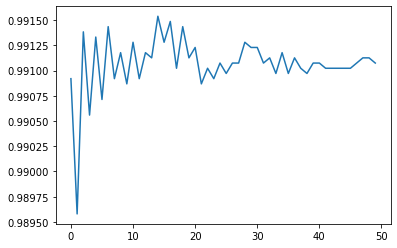

score: 0.9910751134956666


In [30]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')